<a href="https://colab.research.google.com/github/habeshaethiopia/AlphaCare-Insurance-Solutions/blob/main/notebooks/user_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Clone the repository
# %cd AlphaCare-Insurance-Solutions-
# !git pull https://github.com/habeshaethiopia/AlphaCare-Insurance-Solutions.git

# Change the working directory

# Install the necessary dependencies (if any)
# !pip install -r requirements.txt  # If you have a requirements.txt file

/content/AlphaCare-Insurance-Solutions-/AlphaCare-Insurance-Solutions-
From https://github.com/habeshaethiopia/AlphaCare-Insurance-Solutions-
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sys
import os

# Ensure the src directory is in the Python path
sys.path.append(
    os.path.abspath(
        os.path.join(
            "..", "src" # Adjust the directory path as necessary
        )
    )
)
print(os.path.abspath(
        os.path.join(
            "..", "src" # Adjust the directory path as necessary
        )
    ))
from data_preparation import load_data_from_drive_zip
# Importing the necessary functions from data_processing.py
from data_preparation import load_data,clean_data, aggregate_user_data, segment_by_decile, check_for_outliers
from data_preparation import visualize_correlation, plot_total_data_usage, plot_top_categories
from data_preparation import plot_interactive, get_top_consumers, get_usage_by_service
from data_preparation import calculate_growth, describe_data, plot_histogram, plot_scatter, plot_correlation_heatmap, plot_pca
import pandas as pd


/content/AlphaCare-Insurance-Solutions-/src


In [5]:

# Load a sample dataset (replace with your own file path)
file_path = r"https://drive.google.com/file/d/1GOLY8weQTQxcv3zyTN35z7va-WZobgpU/view?usp=drive_link" # Change this to your actual CSV file path
df = load_data_from_drive_zip(file_path)

# Show the first few rows of the dataset
df.head()


Detected encoding: ascii


/content/AlphaCare-Insurance-Solutions-/src/data_preparation.py:43: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(text_file, sep='|', encoding=encoding)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [14]:
df.shape
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
df.describe( include='all')

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1000098,1000098,1000098,1000098,1000098,854137,959866,...,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1.000098e+06,1.000098e+06
unique,NaN,NaN,23,2,4,6,5,1,11,3,...,13,28,22,14,5,4,1,1,NaN,NaN
top,NaN,NaN,2015-08-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Passenger Liability,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,NaN,NaN
freq,NaN,NaN,106747,995075,895210,911929,933555,1000098,260811,597938,...,791235,104158,104183,824124,828125,915028,1000098,1000098,NaN,NaN
mean,1.048175e+05,7.956682e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.192982e+01,0.000000e+00


In [12]:
print(df.duplicated().sum())



0


In [15]:
categorical_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Gender', 'Province', 'VehicleType', 'CoverType']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in IsVATRegistered:
IsVATRegistered
False    995075
True       5023
Name: count, dtype: int64

Unique values in Citizenship:
Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

Unique values in LegalType:
LegalType
Individual           911929
Private company       83891
Close Corporation      2459
Public company         1295
Partnership             331
Sole proprieter         193
Name: count, dtype: int64

Unique values in Gender:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

Unique values in Province:
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

Unique values in VehicleType:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401


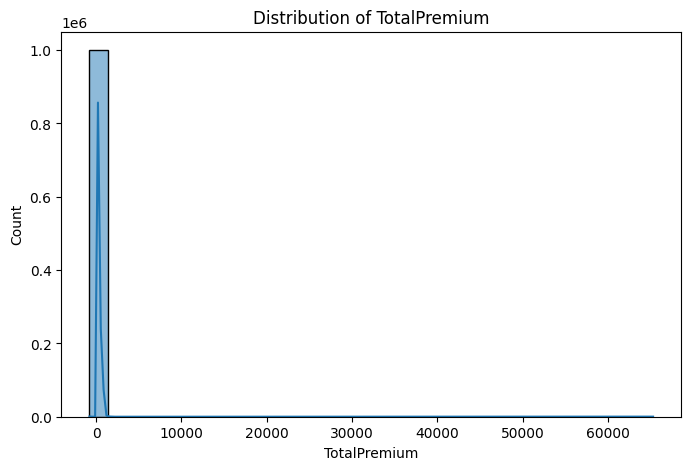

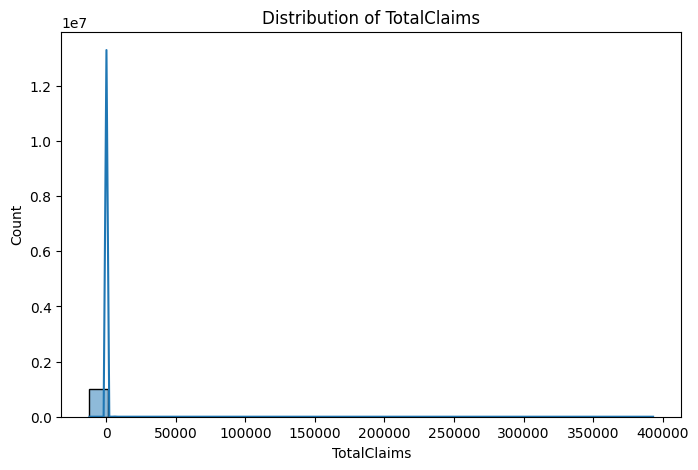

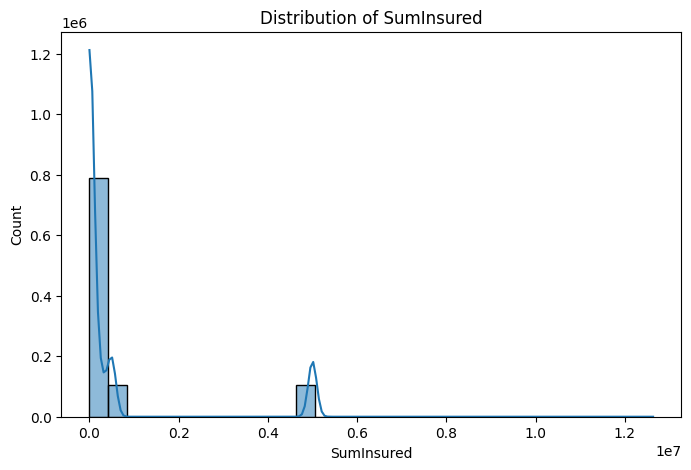

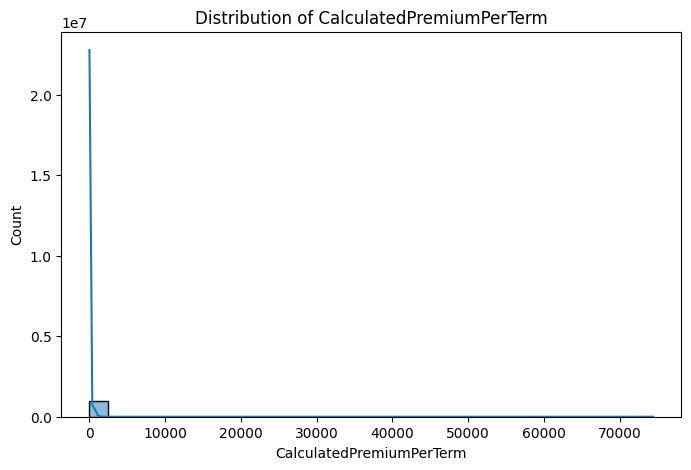

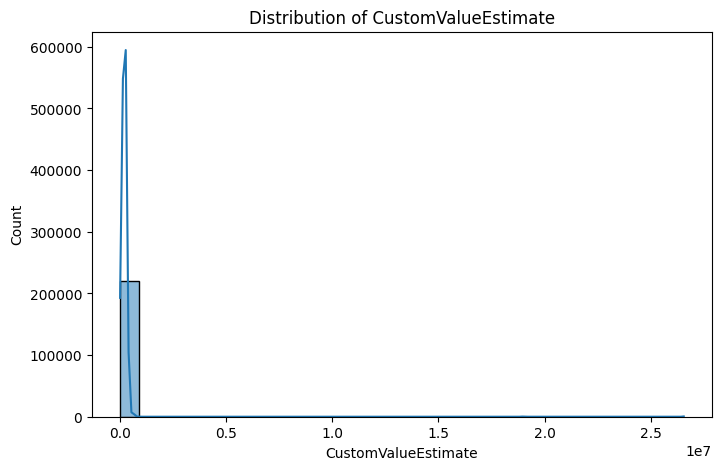

In [16]:

numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

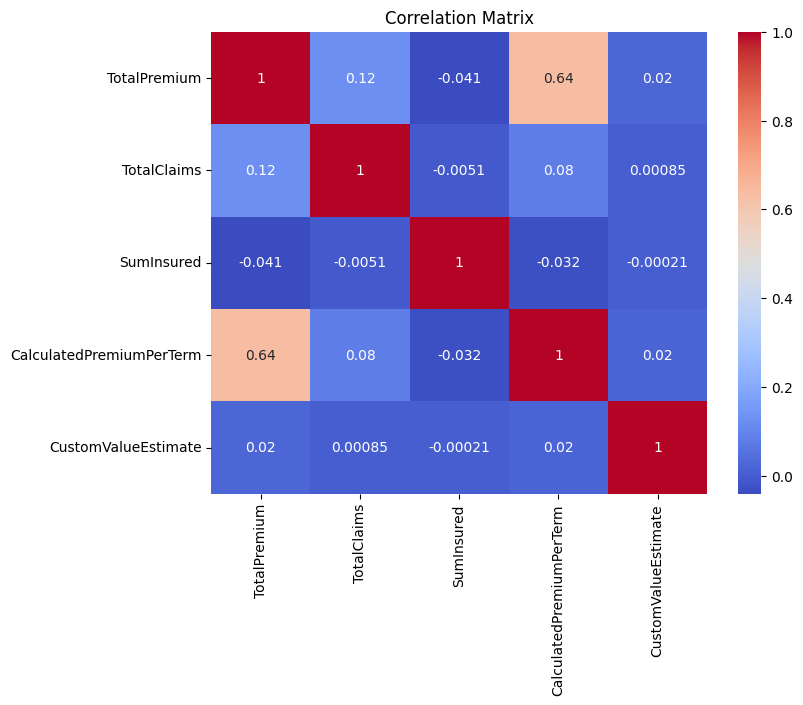

In [19]:
# Correlation Heatmap
from visualization import plot_correlation_heatmap
plot_correlation_heatmap(df, numerical_columns)



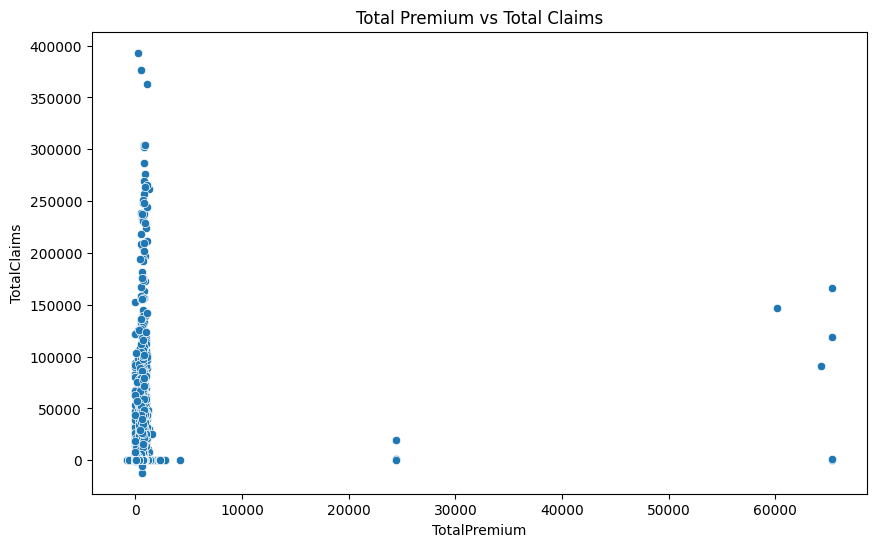

In [22]:
# Relationship between TotalClaims and TotalPremium
from visualization import plot_scatter
plot_scatter(df, 'TotalPremium', 'TotalClaims',"Total Premium vs Total Claims",'TotalPremium', 'TotalClaims')
# plt.figure(figsize=(8, 5))
# sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='CoverType')
# plt.title("Total Premium vs Total Claims")
# plt.show()


<ipython-input-23-f836d99a17ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=claims_by_province, x='Province', y='TotalClaims', palette='viridis')


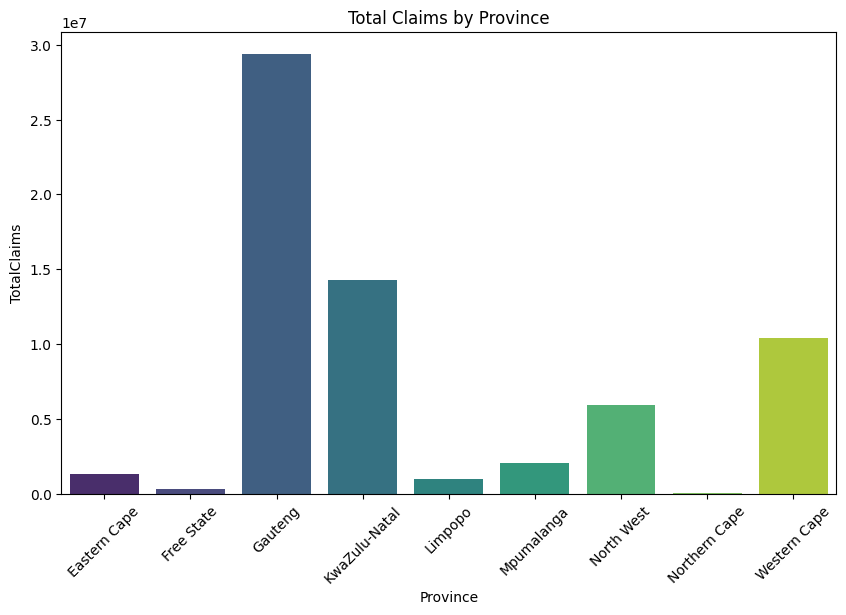

In [23]:
# Analyze Claims by Province
claims_by_province = df.groupby('Province')['TotalClaims'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=claims_by_province, x='Province', y='TotalClaims', palette='viridis')
plt.title("Total Claims by Province")
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-0807a8b74ddc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=premium_by_vehicle, x='VehicleType', y='TotalPremium', palette='viridis')


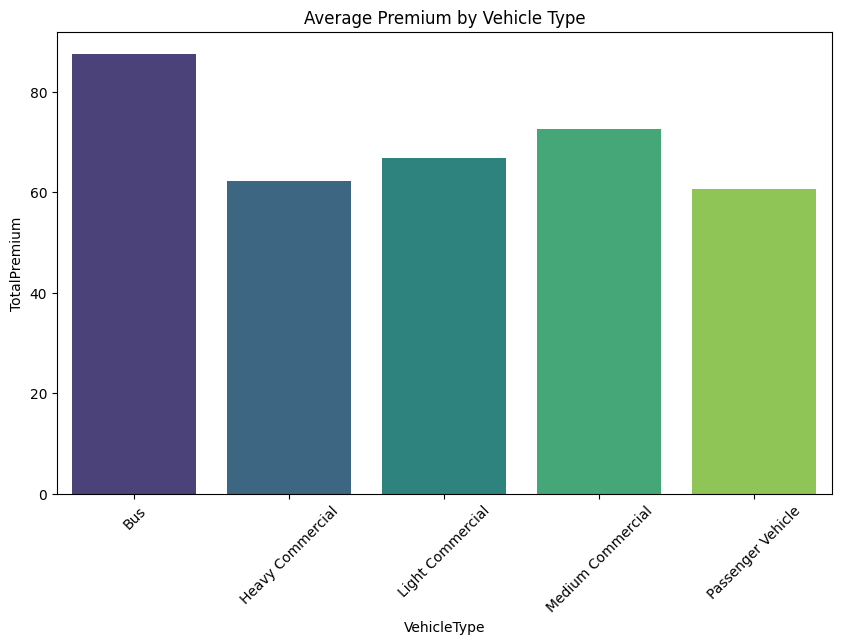

In [24]:
# Analyze Premium by VehicleType
premium_by_vehicle = df.groupby('VehicleType')['TotalPremium'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=premium_by_vehicle, x='VehicleType', y='TotalPremium', palette='viridis')
plt.title("Average Premium by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Risk Profiling: High-Risk vs. Low-Risk Clients
high_risk = df[df['TotalClaims'] > df['TotalClaims'].quantile(0.75)]
low_risk = df[df['TotalClaims'] <= df['TotalClaims'].quantile(0.25)]

print(f"\nHigh-Risk Clients: {len(high_risk)}")
print(f"Low-Risk Clients: {len(low_risk)}")



High-Risk Clients: 2788
Low-Risk Clients: 997310


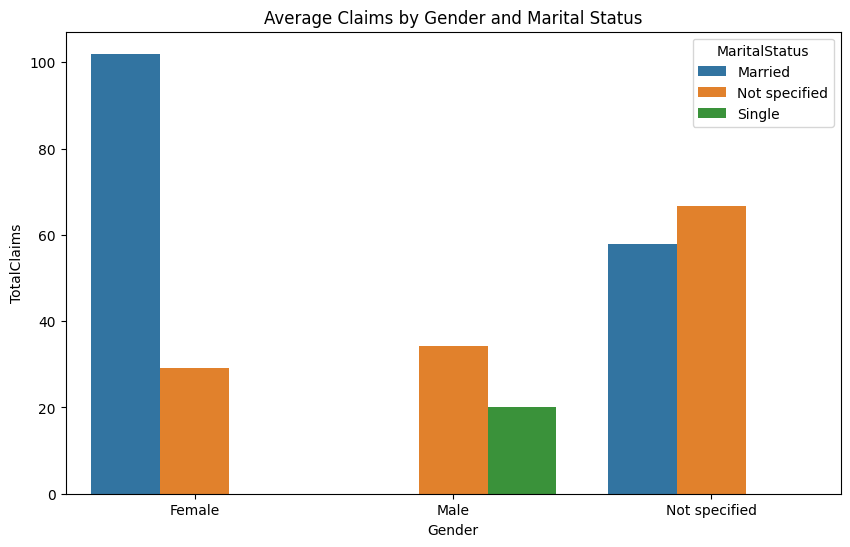

In [26]:
risk_comparison = df.groupby(['Gender', 'MaritalStatus'])['TotalClaims'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=risk_comparison, x='Gender', y='TotalClaims', hue='MaritalStatus')
plt.title("Average Claims by Gender and Marital Status")
plt.show()